In [56]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import floresta as flt
from nltk.corpus import machado as mch
from nltk.corpus import mac_morpho as mcm

from utils import load_six_emotions, load_valence_emotions, generate_corpus
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [57]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

Iniciando processamento...
Filtro e finalização...
Finalizado...


In [58]:
print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_valence_emotions(
    '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt', 
    '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes/SentiLex-PT02/SentiLex-flex-PT02.txt'
)
emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4924
Calculating SVD...
Processing emotional state... this may take a while...
Calculating final emotional matrix...


In [63]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



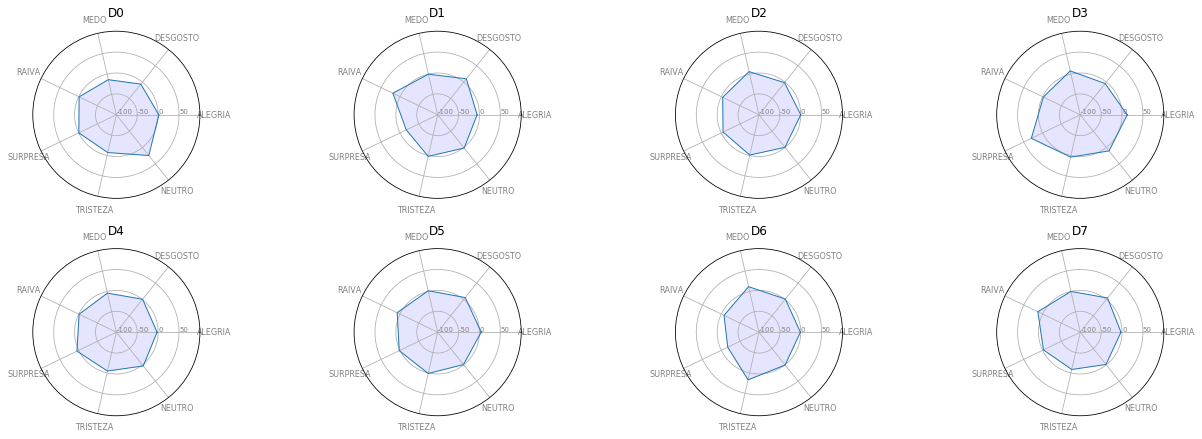

In [64]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

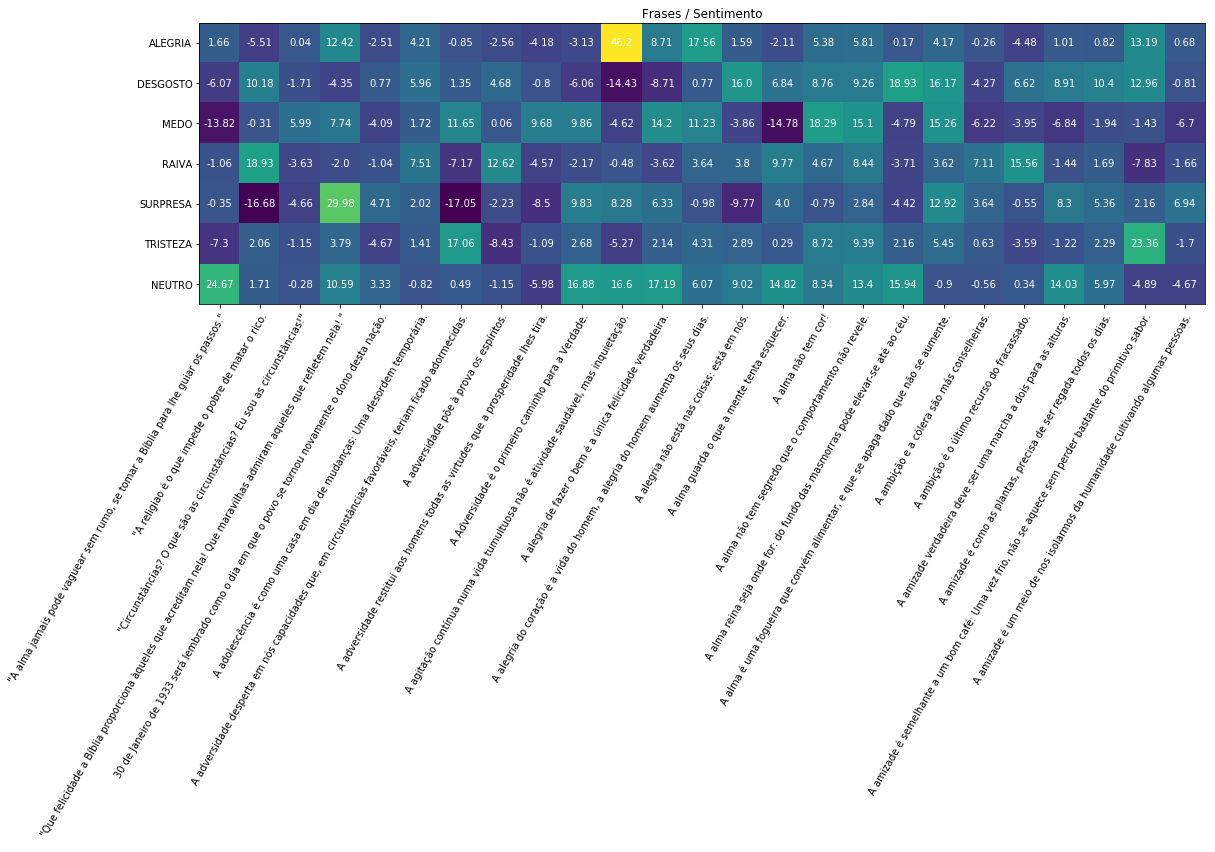

In [69]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [70]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA      1.66
DESGOSTO    -6.07
MEDO       -13.82
RAIVA       -1.06
SURPRESA    -0.35
TRISTEZA    -7.30
NEUTRO      24.67
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     -5.51
DESGOSTO    10.18
MEDO        -0.31
RAIVA       18.93
SURPRESA   -16.68
TRISTEZA     2.06
NEUTRO       1.71
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA     0.04
DESGOSTO   -1.71
MEDO        5.99
RAIVA      -3.63
SURPRESA   -4.66
TRISTEZA   -1.15
NEUTRO     -0.28
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     12.42
DESGOSTO    -4.35
MEDO         7.74
RAIVA       -2.00
SURPRESA    29.98
TRISTEZA     3.79
NEUTRO      1

In [73]:
print('Loading emotional words: ')
emotion_words = load_valence_emotions(
    '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt', 
    '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes/SentiLex-PT02/SentiLex-flex-PT02.txt'
)

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)
    
size = len(original_phrases)
df = pd.DataFrame(predicted[:size], index=ldocs, columns=emotion_words.keys())

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4924
Calculating SVD...
Processing emotional state... this may take a while...
Calculating final emotional matrix...


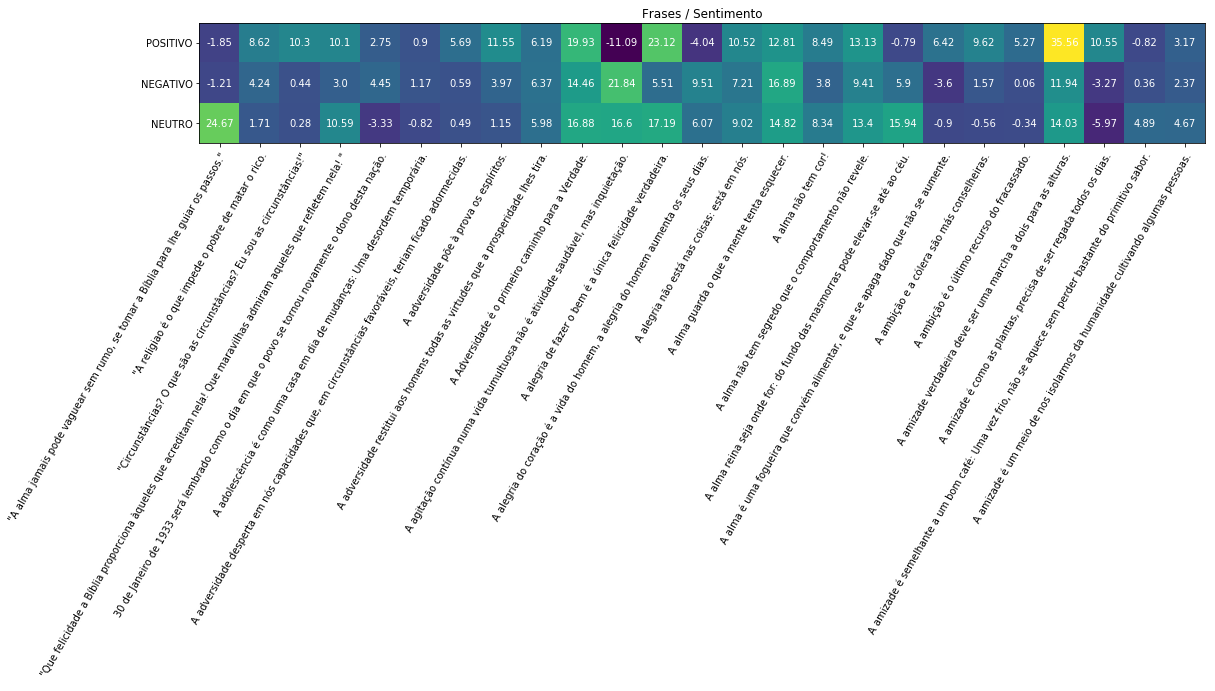

In [74]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

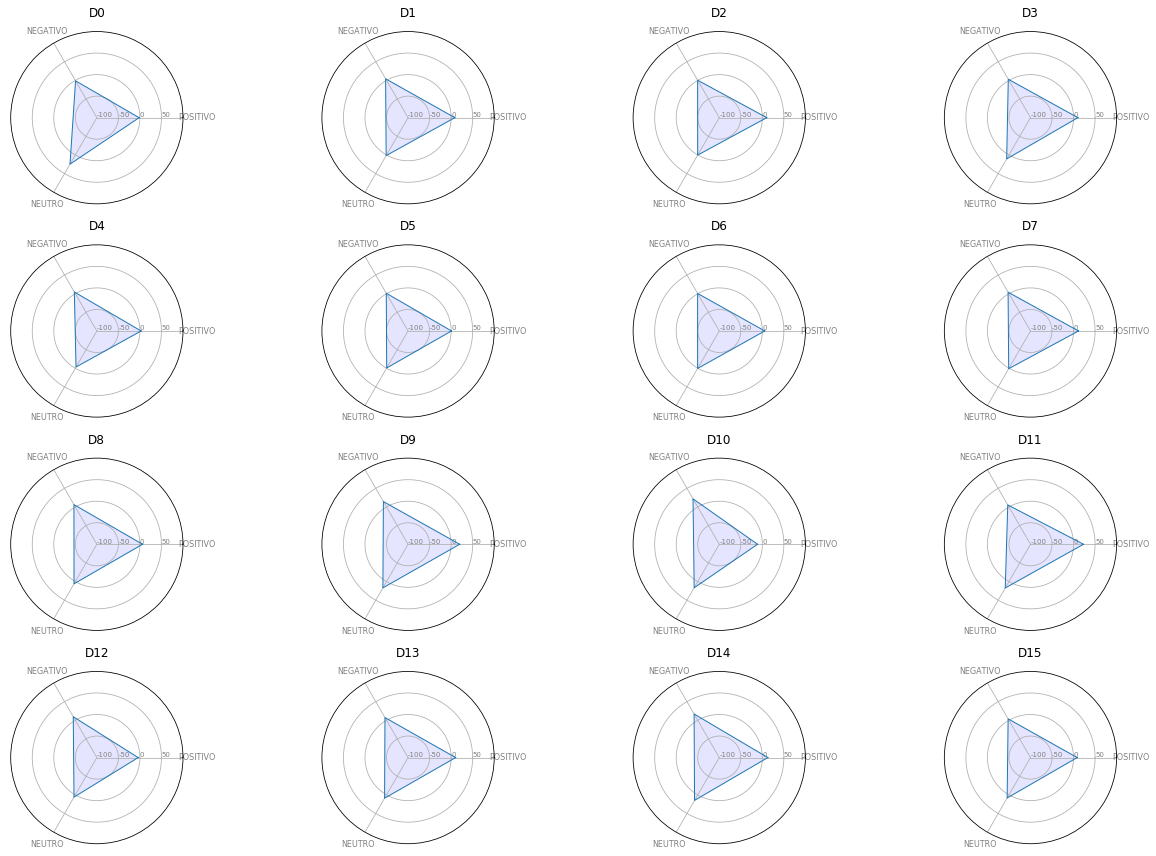

In [75]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [76]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO    -1.85
NEGATIVO    -1.21
NEUTRO      24.67
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    8.62
NEGATIVO    4.24
NEUTRO      1.71
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    10.30
NEGATIVO     0.44
NEUTRO       0.28
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    10.10
NEGATIVO     3.00
NEUTRO      10.59
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO    2.75
NEGATIVO    4.45
NEUTRO     -3.33
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como um

In [77]:
original_tweets = []
sents = []
filename = '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    tweets = h.readlines()
    for tweet in tweets[1:10000]:
        rep = ['\n', '"', '@']
        for r in rep:
            tweet = tweet.replace(r, '')
        infos = tweet.split('|')
        # print(infos)
        original_tweets += [infos[1].strip()]
        sents += [infos[2].strip()]

tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(original_tweets))]
size = len(original_tweets)

Iniciando processamento...
Filtro e finalização...
Finalizado...


In [ ]:
print('Loading emotional words: ')
emotion_words = load_valence_emotions(
    '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt', 
    '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes/SentiLex-PT02/SentiLex-flex-PT02.txt'
)

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words)

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 12207
Calculating SVD...
Processing emotional state... this may take a while...


In [ ]:
df = pd.DataFrame(predicted[:size], index=ltweets, columns=emotion_words.keys())

In [ ]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [ ]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])